In [225]:
import pickle
import pandas as pd
import os
from explainers.dce import DistributionalCounterfactualExplainer
import torch

In [234]:
data_path = 'data/hotel_booking'

In [235]:
factual = pd.read_csv(os.path.join(data_path,'factual.csv'))
counterfactual = pd.read_csv(os.path.join(data_path,'counterfactual.csv'))

In [236]:
factual

,lead_time,booking_changes,is_canceled
0,130,1,0.257706
1,61,0,0.420348
2,45,0,0.403367
3,238,0,0.606922
4,7,0,0.184416
5,114,0,0.469749
6,111,0,0.467982
7,12,0,0.217784
8,196,0,0.546392
9,3,0,0.160680


In [237]:
counterfactual

,lead_time,booking_changes,is_canceled
0,130.552785,1.004129,0.257421
1,57.234758,0.024823,0.410687
2,37.517405,0.019055,0.384150
3,231.371531,0.046833,0.582210
4,3.473794,0.007358,0.160186
5,111.694515,0.029238,0.461733
6,108.711145,0.029120,0.460006
7,7.947409,0.008614,0.186234
8,189.850624,0.042479,0.523055
9,-0.080743,0.006014,0.141850


In [238]:
factual['is_canceled'].mean()

0.37353467700000004

In [239]:
counterfactual['is_canceled'].mean()

0.356753371

In [232]:
factual.lead_time.mean()

89.1

In [233]:
counterfactual.lead_time.mean()

88.69725361184159

In [224]:
with open(os.path.join(data_path, 'explainer.pkl'), 'rb') as file:
    explainer = pickle.load(file)

In [205]:
explainer.y_prime

tensor([[0.4348]], requires_grad=True)

In [206]:
explainer.term2

tensor(-9.9669e-07)

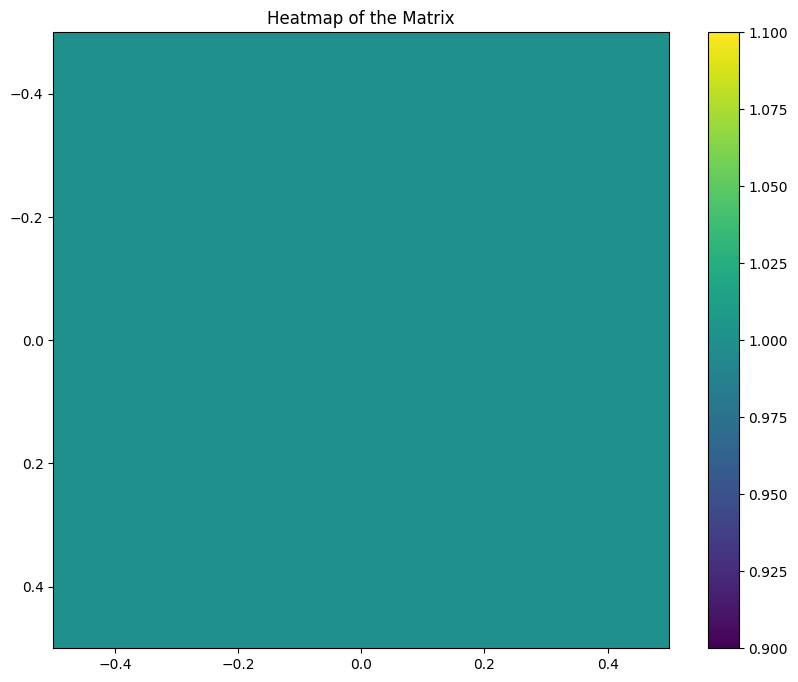

In [207]:
import numpy as np
import matplotlib.pyplot as plt

# Sample matrix for demonstration
matrix = explainer.wd.nu.detach().numpy()

plt.figure(figsize=(10, 8))
plt.imshow(matrix, cmap='viridis')
plt.colorbar()
plt.title("Heatmap of the Matrix")
plt.show()


In [208]:
explainer.wd.nu

tensor([[1.]])

In [209]:
explainer.model(explainer.X).unsqueeze(1) - explainer.model(explainer.X_prime).unsqueeze(0)

tensor([[[-0.1086]]], grad_fn=<SubBackward0>)

In [210]:
explainer.model(explainer.X)

tensor([[0.4348]], grad_fn=<SigmoidBackward0>)

In [211]:
n, m = explainer.X.shape[0], explainer.X_prime.shape[0]
nu = explainer.wd.nu
term = torch.tensor(0.0, dtype=torch.float)
for i in range(n):
    for j in range(m):
        term += (
            nu[i, j]
            * (explainer.model(explainer.X[i]) - explainer.model(explainer.X_prime[j])) ** 2
        ).item()
term2 = explainer.lambda_val * (explainer.epsilon - term)
term2

tensor(-0.0118)

In [212]:
term

tensor(0.0118)

In [213]:
nu

tensor([[1.]])

In [214]:
explainer.model(explainer.X[0])

tensor([0.4348], grad_fn=<SigmoidBackward0>)

In [191]:
explainer.model(explainer.X_prime[j])

tensor([0.5078], grad_fn=<SigmoidBackward0>)

In [192]:
explainer.model(explainer.X_prime).unsqueeze(0)

tensor([[[0.5078]]], grad_fn=<UnsqueezeBackward0>)

In [194]:
explainer.y_prime.unsqueeze(0)

tensor([[[0.4062]]], grad_fn=<UnsqueezeBackward0>)